m = 5, n = 5, extrema(df_welch) = (4.001542923845128, 7.999999999999944)
m = 10, n = 10, extrema(df_welch) = (9.16377084639145, 17.999999999999996)
m = 5, n = 10, extrema(df_welch) = (4.016118488180367, 12.999999999999844)
m = 5, n = 15, extrema(df_welch) = (4.069503516139006, 17.99999999999781)



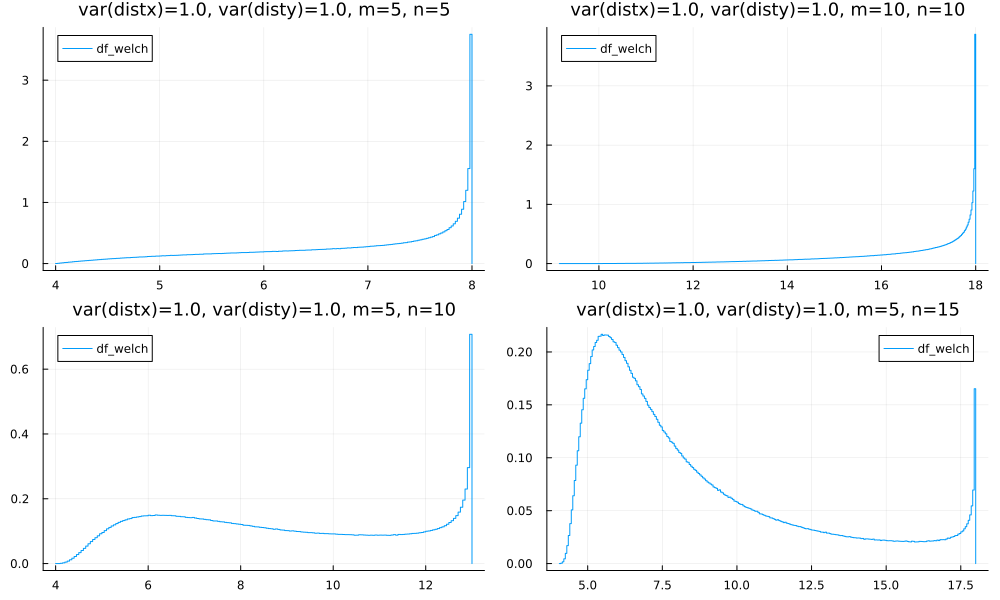

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=12)

function degree_of_freedom_welch(m, sx², n, sy²)
    (sx²/m + sy²/n)^2 / ((sx²/m)^2/(m-1) + (sy²/n)^2/(n-1))
end

function degree_of_freedom_welch(x, y)
    m, sx² = length(x), var(x)
    n, sy² = length(y), var(y)
    degree_of_freedom_welch(m, sx², n, sy²)
end

function plot_df_welch(; distx=Normal(0, 1), disty=Normal(0, 1), m=5, n=5, L=10^7)
    xtmp, ytmp = zeros(m), zeros(n)
    df_welch = [degree_of_freedom_welch(rand!(distx, xtmp), rand!(disty, ytmp)) for _ in 1:L]
    println("m = ", m, ", n = ", n, ", extrema(df_welch) = ", extrema(df_welch))
    stephist(df_welch; norm=true, label="df_welch")
    title!("var(distx)=$(var(distx)), var(disty)=$(var(disty)), m=$m, n=$n")
end

PP = []
for (m, n) in ((5, 5), (10, 10), (5, 10), (5, 15))
    P = plot_df_welch(; distx=Normal(0, 1), disty=Normal(0, 1), m, n)
    push!(PP, P)
end
println()
plot(PP...; size=(1000, 600), layout=(2, 2))

m = 5, n = 5, extrema(df_welch) = (4.000629254618989, 7.9999999999978675)
m = 10, n = 10, extrema(df_welch) = (9.043471802195885, 17.999999999995666)
m = 5, n = 10, extrema(df_welch) = (4.157463123552974, 12.999999999999993)
m = 5, n = 15, extrema(df_welch) = (4.236682602168687, 17.999999999999417)
m = 10, n = 5, extrema(df_welch) = (4.009369922804846, 12.999999999999947)
m = 15, n = 5, extrema(df_welch) = (4.016326571339162, 17.999999999820265)



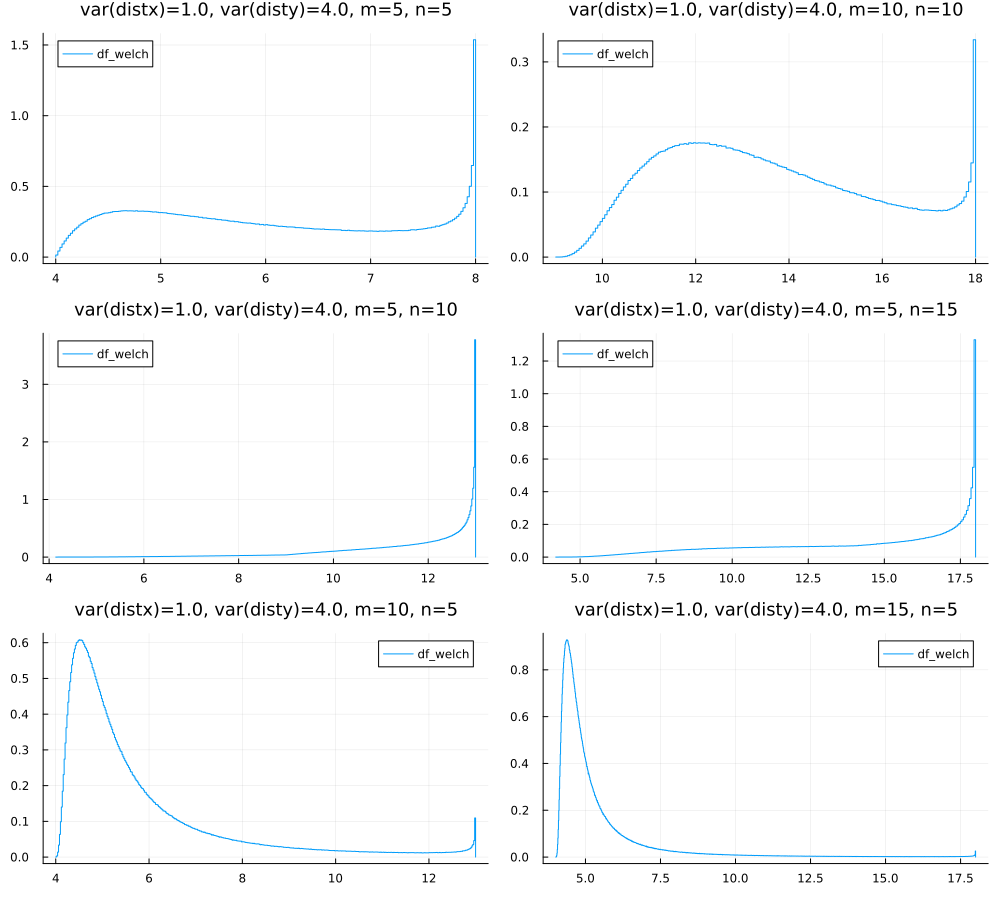

In [3]:
PP = []
for (m, n) in ((5, 5), (10, 10), (5, 10), (5, 15), (10, 5), (15, 5))
    P = plot_df_welch(; distx=Normal(0, 1), disty=Normal(0, 2), m, n)
    push!(PP, P)
end
println()
plot(PP...; size=(1000, 900), layout=(3, 2))